In [20]:
using Random
using Distributions
using Plots

In [21]:
# Plant the random seed for reproducibility
USE_RANDOM_SEED = false
RANDOM_SEED_VALUE = 421
if USE_RANDOM_SEED
    Random.seed!(RANDOM_SEED_VALUE)
end

In [22]:
# Parameters
K = 12   # Number of arms
T = 1e2 # Number of timesteps
AVG_MIN = -10
AVG_MAX = +10
STD_MIN = 1e-1
STD_MAX = 1e0

1.0

In [23]:
# Hyperparameters
epsilon = 0.5 # Exploration instead of exploitation
epsilon_decay = 0.99 # Incremental decrease of epsilon

0.99

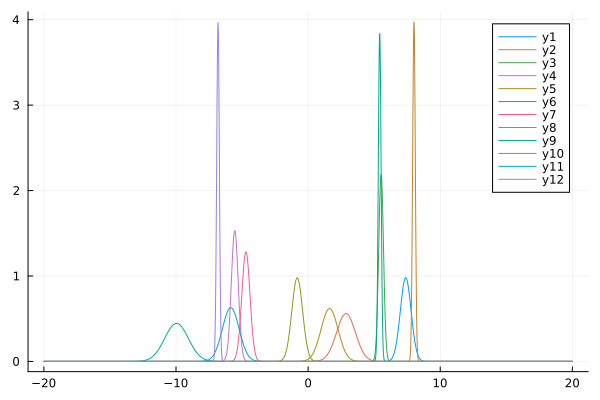

In [24]:
arm_avg = zeros(K)
arm_std = zeros(K)

p = plot()
x = 2*AVG_MIN:1e-2:2*AVG_MAX

for k in 1:K
    # Define distributions
    arm_avg[k] = rand(Uniform(AVG_MIN, AVG_MAX))
    arm_std[k] = rand(Uniform(STD_MIN, STD_MAX))
    # Plot distributions
    d = Normal(arm_avg[k], arm_std[k])
    plot!(x, pdf.(d, x))
end

display(p)

In [25]:
Q = zeros(K)
r_cumulated = 0
r = 0

for t in 1:T
    
    if rand(Uniform(0, 1)) < epsilon
        # Exploration
        k_select = rand(1:K)
    else
        # Exploitation (TODO: randomly break ties)
        k_select = mapslices(argmax, Q, dims = 1)[1]
    end
    
    # Obtain reward
    r = rand(Normal(arm_avg[k_select], arm_std[k_select]), 1)[1]

    # Update the quality table
    Q[k_select] = Q[k_select] + (r - Q[k_select]) / t
    
    # Update the cumulated rewards
    r_cumulated += r
    
    # Update epsilon
    epsilon *= epsilon_decay
end

println(r)

8.110239419377619
